*created by Laura Brin for CMPT3830: Machine Learning Work Integrated Project at Norquest College*

# Board Game Ratings

### Board Game Insights 
The board game industry is a growing industry. Valued at 13.75 billion USD in 2021, this sector is expected to increase in value to 30.93 billion by 2028 (Globenewswire). There is an increasing trend among board game enthusiasts towards independent developers with word of mouth and kickstarter being the main way of learning about new games (PrintNinja). The ideal user of this application will be indie developers looking to improve their decisions around developing new games for the market. It could also be used by hobby stores to visualize trends to help make purchasing decisions. <br>

The product backlog for this project is a bit ambitious. We would like to provide multiple options for potential game developers or creators to interact with the models. The main output will be an estimation of rating based on provided information about a game the user is developing or looking to acquire. By experimenting with different game details the user can evaluate if there would be value in making changes to their game. We would also like to develop an interactive way to view time-series trends using ipywidgets. <br>

Additional features that would be great to introduce but will be outside of the time scope available include using keywords to return likelihood of kickstarter success and/or potential game rating and inputting game information and receiving a ranking of best months/quarters to launch the game in kickstarter. <br>

load libraries

In [2]:
import sqlite3 
import pandas as pd
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt

importing datasets

In [3]:
#importing datasets for board games

zf = ZipFile('database.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()
df_games= pd.read_sql_query("SELECT* FROM BoardGames",conn)
#conn.close()


#importing datasets for Kickstarter

zf = ZipFile('ks-projects-201801.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

df_ks=pd.read_csv("ks-projects-201801.csv")

In [4]:
df_games_clean=df_games.copy()

 ### Games Dataset-Laura

In [5]:
#grouping df_games columns to useable sections using game.id as key
details=["game.id","game.type","details.description","details.image","details.maxplayers","details.maxplaytime","details.minage",
"details.minplayers","details.minplaytime","details.name","details.playingtime","details.thumbnail","details.yearpublished"]
attributes=["game.id","attributes.boardgameartist","attributes.boardgamecategory","attributes.boardgamecompilation","attributes.boardgamedesigner","attributes.boardgameexpansion",
"attributes.boardgamefamily","attributes.boardgameimplementation","attributes.boardgameintegration","attributes.boardgamemechanic","attributes.boardgamepublisher","attributes.total","attributes.t.links.concat.2...."]
stats_family=["game.id","stats.family.abstracts.bayesaverage","stats.family.cgs.bayesaverage","stats.family.cgs.pos",
"stats.family.childrensgames.bayesaverage","stats.family.childrensgames.pos","stats.family.familygames.bayesaverage","stats.family.familygames.pos",
"stats.family.partygames.bayesaverage","stats.family.partygames.pos","stats.family.strategygames.bayesaverage","stats.family.strategygames.pos","stats.family.thematic.bayesaverage","stats.family.thematic.pos",
"stats.family.wargames.bayesaverage","stats.family.wargames.pos","stats.family.amiga.bayesaverage","stats.family.amiga.pos","stats.family.arcade.bayesaverage","stats.family.arcade.pos","stats.family.atarist.bayesaverage","stats.family.atarist.pos",
"stats.family.commodore64.bayesaverage","stats.family.commodore64.pos"]
stats=["game.id","stats.average","stats.averageweight","stats.bayesaverage","stats.median","stats.numcomments","stats.numweights","stats.owned","stats.stddev", "stats.trading","stats.usersrated","stats.wanting","stats.wishing","stats.subtype.boardgame.bayesaverage",
"stats.subtype.boardgame.pos","stats.subtype.rpgitem.bayesaverage","stats.subtype.rpgitem.pos","stats.subtype.videogame.bayesaverage","stats.subtype.videogame.pos"]
polls=["game.id","polls.language_dependence","polls.suggested_numplayers.1","polls.suggested_numplayers.10","polls.suggested_numplayers.2","polls.suggested_numplayers.3","polls.suggested_numplayers.4",
"polls.suggested_numplayers.5","polls.suggested_numplayers.6","polls.suggested_numplayers.7","polls.suggested_numplayers.8","polls.suggested_numplayers.9","polls.suggested_numplayers.Over","polls.suggested_playerage"]

In [6]:
#creating smaller dataframes to work with for data exploration
df_games_details=df_games[details]
df_games_attributes=df_games[attributes]
df_games_stats_family=df_games[stats_family]
df_games_stats=df_games[stats]
df_games_polls=df_games[polls]

#### Game Details Features

**ID:** BGG item ID <br>
**Type:** Boardgame. BGG has reviews for other products outside of boardgames. this dataset was scrapped using boardgame as the key feature <br>
**Description:** description of the game on the site. description is sometimes supplied by the publisher <br>
**Image:** XML code of the jpeg document number. Becuase this dataset is sourced from a SQLite server, unstructured data like the jpeg did not migrate. <br>
**Max Players:** maximim number of players the game can suppport without <br>
**Max Playtime:** suggested/approximate maximum time for a single playthrough. Generally this represents the average  playtime and is not a hard cap on playtime<br>
**Min Age:** suggesting minimum age for players <br>
**Min players:** minimum required players <br>
**Min players:** suggested minimum time for a single playthrough <br>
**Name:** Name of the boardgame <br>
**Playingtime:** suggested playingtime <br>
**Thumbnail:** XML code of the jpeg document number. Becuase this dataset is sourced from a SQLite server, unstructured data like the jpeg did not migrate. <br>
**Year published:** year the game was published <br>

If a range of times for play is not given, the minplaytime,maxplaytime and playtime features all display the same value. In general most games have a single Min time listed, with the other 2 features reflecting this value.

In [7]:
df_games_details.head(10)

,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.thumbnail,details.yearpublished
0,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,240.0,Die Macher,240.0,//cf.geekdo-images.com/images/pic159509_t.jpg,1986.0
1,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,30.0,Dragonmaster,30.0,//cf.geekdo-images.com/images/pic184174_t.jpg,1981.0
2,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,30.0,Samurai,60.0,//cf.geekdo-images.com/images/pic3211873_t.jpg,1998.0
3,4,boardgame,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4.0,60.0,12.0,2.0,60.0,Tal der Könige,60.0,//cf.geekdo-images.com/images/pic285299_t.jpg,1992.0
4,5,boardgame,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6.0,90.0,12.0,3.0,90.0,Acquire,90.0,//cf.geekdo-images.com/images/pic342163_t.jpg,1964.0
5,6,boardgame,"In the ancient lands along the Mediterranean, ...",//cf.geekdo-images.com/images/pic28424.jpg,6.0,240.0,12.0,2.0,240.0,Mare Mediterraneum,240.0,//cf.geekdo-images.com/images/pic28424_t.jpg,1989.0
6,7,boardgame,"In Cathedral, each player has a set of pieces ...",//cf.geekdo-images.com/images/pic181642.jpg,2.0,20.0,8.0,2.0,20.0,Cathedral,20.0,//cf.geekdo-images.com/images/pic181642_t.jpg,1978.0
7,8,boardgame,"In this interesting offering from Warfrog, pla...",//cf.geekdo-images.com/images/pic374320.jpg,5.0,120.0,12.0,2.0,120.0,Lords of Creation,120.0,//cf.geekdo-images.com/images/pic374320_t.jpg,1993.0
8,9,boardgame,"Although referred to as a sequel to El Grande,...",//cf.geekdo-images.com/images/pic1731731.jpg,4.0,90.0,13.0,2.0,90.0,El Caballero,90.0,//cf.geekdo-images.com/images/pic1731731_t.jpg,1998.0
9,10,boardgame,Elfenland is a redesign of the original White ...,//cf.geekdo-images.com/images/pic1798136.jpg,6.0,60.0,10.0,2.0,60.0,Elfenland,60.0,//cf.geekdo-images.com/images/pic1798136_t.jpg,1998.0


In [8]:
df_games_details.isnull().sum()

game.id                     0
game.type                   0
details.description         0
details.image            6892
details.maxplayers          3
details.maxplaytime         3
details.minage              3
details.minplayers          3
details.minplaytime         3
details.name                0
details.playingtime         3
details.thumbnail        6892
details.yearpublished       3
dtype: int64

In [9]:
df_games_details.shape

(90400, 13)

In [10]:
df_games_details.dtypes

game.id                   object
game.type                 object
details.description       object
details.image             object
details.maxplayers       float64
details.maxplaytime      float64
details.minage           float64
details.minplayers       float64
details.minplaytime      float64
details.name              object
details.playingtime      float64
details.thumbnail         object
details.yearpublished    float64
dtype: object

In [11]:
df_games_details.describe()

,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.playingtime,details.yearpublished
count,90397.000000,90397.000000,90397.000000,90397.000000,90397.000000,90397.000000,90397.000000
mean,5.732004,51.773731,7.121143,1.982533,46.104506,51.773731,1814.056584
std,53.449543,331.657193,5.056647,0.860299,316.313227,331.657193,580.656445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3500.000000
25%,2.000000,5.000000,0.000000,2.000000,10.000000,5.000000,1986.000000
50%,4.000000,30.000000,8.000000,2.000000,30.000000,30.000000,2005.000000
75%,6.000000,60.000000,12.000000,2.000000,60.000000,60.000000,2012.000000
max,11299.000000,60120.000000,120.000000,50.000000,60120.000000,60120.000000,2019.000000


need to  look at outliers in max players, min players, min age, min playtime, -3500 for year published

In [12]:
df_games_details["details.maxplayers"].unique()

array([5.0000e+00, 4.0000e+00, 6.0000e+00, 2.0000e+00, 7.0000e+00,
       8.0000e+00, 1.6000e+01, 1.5000e+01, 3.0000e+00, 1.0000e+01,
       1.2000e+01, 9.0000e+00, 0.0000e+00, 1.0000e+02, 3.0000e+01,
       2.0000e+01, 1.0000e+00, 2.4000e+01, 4.1000e+01, 9.9000e+01,
       1.8000e+01, 3.3000e+01, 5.0000e+01, 1.3000e+01, 3.6000e+01,
       3.2000e+01, 2.5000e+01, 6.4000e+01, 2.2000e+01, 3.6200e+02,
       5.2000e+01, 8.8000e+01, 4.0000e+01, 1.4000e+01, 4.8000e+01,
       1.0100e+02, 1.1299e+04, 1.0200e+02, 5.6000e+01, 1.7000e+01,
       2.7000e+01, 4.2000e+01, 2.1000e+01, 1.1000e+01, 2.8000e+01,
       5.4000e+01, 6.0000e+01, 3.4000e+01, 3.9000e+01, 3.5000e+01,
       1.9000e+01, 2.6000e+01, 5.3000e+01, 2.0000e+02, 9.9900e+02,
       1.2000e+02, 1.0000e+03, 3.1000e+01, 8.0000e+01, 2.0000e+03,
       6.0000e+02, 3.7000e+01, 3.9900e+02, 1.5000e+02, 6.8000e+01,
       4.3000e+01, 1.1200e+02, 4.4000e+01, 7.5000e+01, 6.1000e+01,
       5.1000e+01, 5.0000e+02,        nan, 9.0000e+02, 4.0000e

In [13]:
df_games_details[df_games_details["details.maxplayers"]>30]

,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.thumbnail,details.yearpublished
583,650,boardgame,Fairy Meat is Kenzer &amp; Company's acclaimed...,//cf.geekdo-images.com/images/pic26594.jpg,100.0,60.0,12.0,2.0,60.0,Fairy Meat,60.0,//cf.geekdo-images.com/images/pic26594_t.jpg,2000.0
950,1097,boardgame,Described by the Publisher/Designer:&#10;&#10;...,//cf.geekdo-images.com/images/pic139086.jpg,41.0,120.0,8.0,6.0,120.0,Don't Give Up Your Day Job!,120.0,//cf.geekdo-images.com/images/pic139086_t.jpg,2000.0
1105,1288,boardgame,Jitters is a timed word game where players dra...,//cf.geekdo-images.com/images/pic363575.jpg,99.0,30.0,10.0,1.0,30.0,Jitters,30.0,//cf.geekdo-images.com/images/pic363575_t.jpg,1986.0
1313,1516,boardgame,Billed as the Official Game of the United Stat...,//cf.geekdo-images.com/images/pic52503.jpg,33.0,120.0,10.0,2.0,120.0,USAC Auto Racing,120.0,//cf.geekdo-images.com/images/pic52503_t.jpg,1979.0
1316,1519,boardgame,Reality as you know it is a lie. The world we...,//cf.geekdo-images.com/images/pic492312.jpg,99.0,45.0,14.0,2.0,45.0,Kult,45.0,//cf.geekdo-images.com/images/pic492312_t.jpg,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90181,219393,boardgame,The game is a handheld dome containing 15 dice...,None,99.0,0.0,0.0,1.0,0.0,"Shake, Rattle & Roll",0.0,None,1987.0
90184,219402,boardgame,Description from the publisher:&#10;&#10;Orang...,None,99.0,15.0,18.0,2.0,15.0,Orange Toss,15.0,None,2016.0
90261,219602,boardgame,Le Billard Finlandais is a handmande woodgame ...,None,99.0,30.0,8.0,2.0,30.0,Le Billard Finlandais,30.0,None,2016.0
90293,219723,boardgameexpansion,This ship is the competitive prize for the &qu...,//cf.geekdo-images.com/images/pic3438965.jpg,99.0,60.0,14.0,1.0,60.0,Star Trek: Attack Wing – U.S.S. Enterprise-D E...,60.0,//cf.geekdo-images.com/images/pic3438965_t.jpg,2017.0


In [14]:
df_games_details["details.minplayers"].unique()


array([ 3.,  2.,  1.,  4.,  0.,  6.,  8.,  5.,  7., 10., 11., 14., 15.,
       25., 24., 12., 20., 16., 13., 40.,  9., 18., nan, 50.])

min players >12 may become a problem for outliers

In [15]:
#df_games_details[df_games_details["details.minplayers"]>10]

In [16]:
df_games_details.isnull().sum()

game.id                     0
game.type                   0
details.description         0
details.image            6892
details.maxplayers          3
details.maxplaytime         3
details.minage              3
details.minplayers          3
details.minplaytime         3
details.name                0
details.playingtime         3
details.thumbnail        6892
details.yearpublished       3
dtype: int64

In [17]:
df_games_details=df_games_details.dropna()

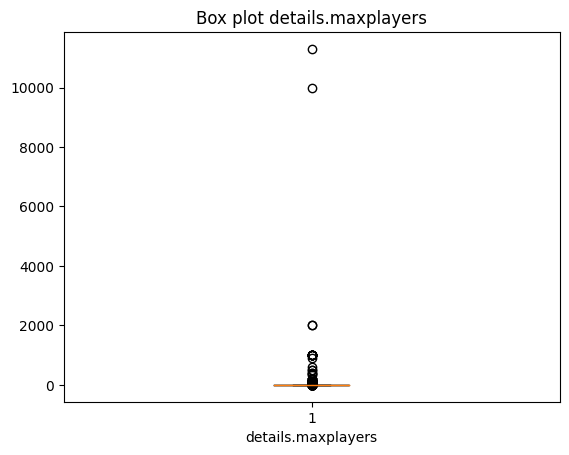

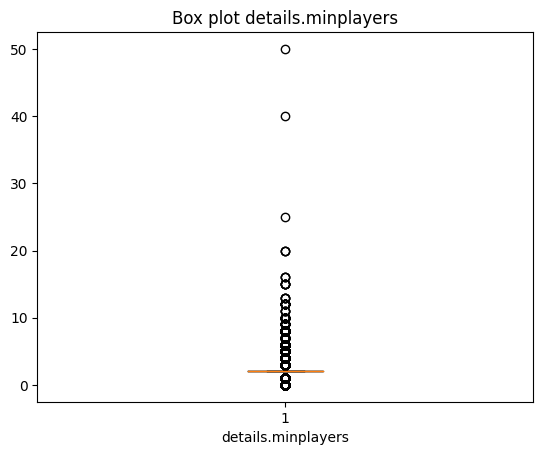

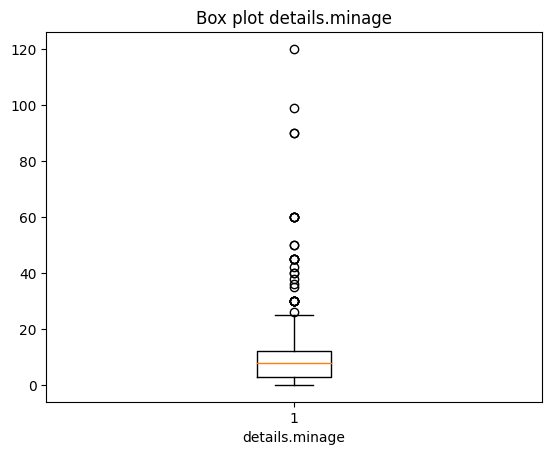

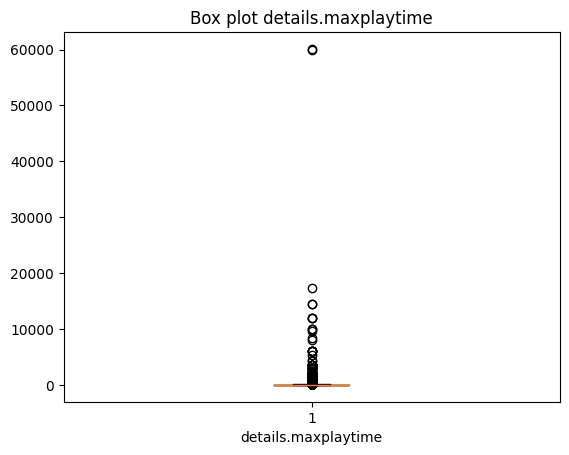

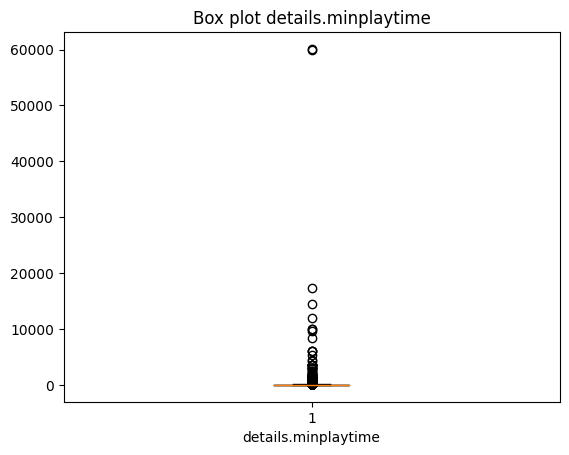

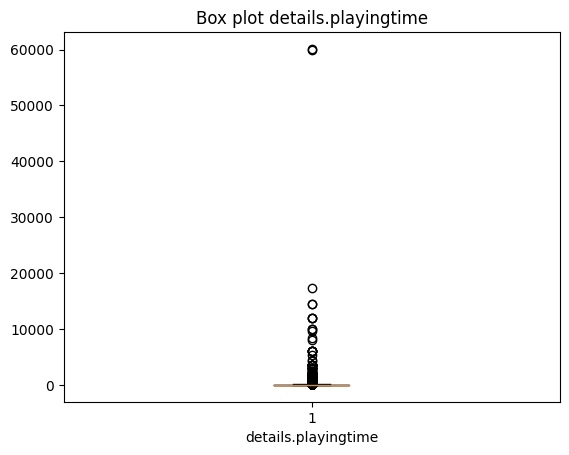

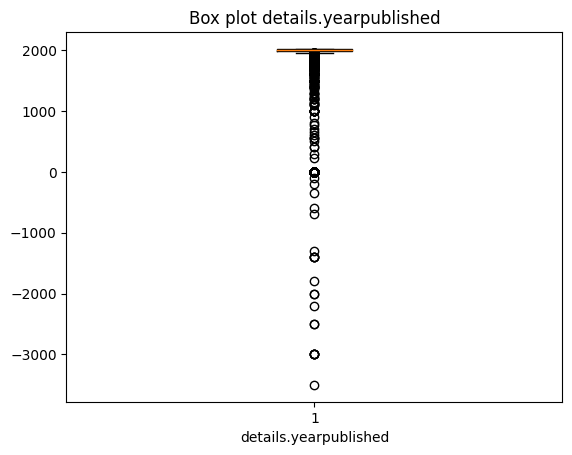

In [18]:
col_list=["details.maxplayers","details.minplayers","details.minage","details.maxplaytime","details.minplaytime","details.playingtime","details.yearpublished"]
for col in col_list:
    plt.boxplot(df_games_details[col])
    plt.xlabel(col)
    plt.title(f"Box plot {col}")
    plt.show()


Decisions from outlier visualization and investigation <br>
max players. games with >30 players =851, 531 of which are 99, 86 are >100 a default max value for games that have not been assessed for player number.  high player values are also given to minatures or collectable card games (organized play) where indivdual games generally are 2-4 players, but technically have no maximum. Specifically large numbers represent games with a theoretical max number of players (based on number of cards) but likely gameplay would not work with this number **investigate using community reccommend/best to replace high values** <br>

Min players: games with >12 min players =20, >20 =3. higher values represent large party games- **not necessary to remove**

Min age: number of games with min age >21 = 43, unclear pattern regarding setting higher age min. some dont have age on website, some are marketted towards seniors. **probably no issues with replacing high values with 21/adult**

min playtime, max playtime and playingtime in most cases are exactly the same, ~250 above 8h playtime
long playingtimes are generally war & strategy games, some games also have multiple chapters or legacy styles **should be able to keep contextual outliers with proper scalling**

year_published: keep for time visualizations. records ancient/historical games pre 1BC **use timeseries visualizations to decided if this feature needs to remain**

In [19]:
#investigating max player outliers
#df_games_details[df_games_details["details.maxplayers"]>30]
#df_games_details[df_games_details["details.maxplayers"]==99]
#df_games_details[df_games_details["details.maxplayers"]>99]

#investigating min player outliers
#df_games_details[df_games_details["details.minplayers"]>12]
#df_games_details[df_games_details["details.minplayers"]>20]

#investigating min age
#df_games_details[df_games_details["details.minage"]>21]

#investigating playtime
#df_games_details[df_games_details["details.playingtime"]>500]

#investigate published
df_games_details[df_games_details["details.yearpublished"]<0]


,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.thumbnail,details.yearpublished
172,188,boardgame,"By all appearances, it's just two players taki...",//cf.geekdo-images.com/images/pic1728832.jpg,2.0,180.0,8.0,2.0,30.0,Go,180.0,//cf.geekdo-images.com/images/pic1728832_t.jpg,-2200.0
1396,1602,boardgame,The game has been published under different na...,//cf.geekdo-images.com/images/pic1468169.jpg,2.0,30.0,10.0,2.0,30.0,The Royal Game of Ur,30.0,//cf.geekdo-images.com/images/pic1468169_t.jpg,-2500.0
2134,2397,boardgame,Backgammon is a classic abstract strategy game...,//cf.geekdo-images.com/images/pic55221.jpg,2.0,30.0,8.0,2.0,30.0,Backgammon,30.0,//cf.geekdo-images.com/images/pic55221_t.jpg,-3000.0
2136,2399,boardgame,Senet is an ancient Egyptian board game simila...,//cf.geekdo-images.com/images/pic361022.jpg,2.0,30.0,6.0,2.0,30.0,Senet,30.0,//cf.geekdo-images.com/images/pic361022_t.jpg,-3500.0
2606,2912,boardgame,The Ancient Egyptian game known to us as &quot...,//cf.geekdo-images.com/images/pic403372.jpg,2.0,20.0,6.0,2.0,20.0,Hounds and Jackals: Game of the Pharaohs,20.0,//cf.geekdo-images.com/images/pic403372_t.jpg,-2000.0
3513,3886,boardgame,Nine Men's Morris is a very old game that has ...,//cf.geekdo-images.com/images/pic438639.jpg,2.0,20.0,6.0,2.0,20.0,Nine Men's Morris,20.0,//cf.geekdo-images.com/images/pic438639_t.jpg,-1400.0
3757,4148,boardgame,"In the 1920s, anthropologists, explorers and a...",//cf.geekdo-images.com/images/pic108556.jpg,6.0,20.0,5.0,2.0,20.0,Mehen,20.0,//cf.geekdo-images.com/images/pic108556_t.jpg,-3000.0
4946,5432,boardgame,Traditional game from ancient India was brough...,//cf.geekdo-images.com/images/pic288406.jpg,6.0,30.0,3.0,2.0,30.0,Snakes and Ladders,30.0,//cf.geekdo-images.com/images/pic288406_t.jpg,-200.0
5046,5546,boardgame,Marbles was played in ancient Egypt who used s...,//cf.geekdo-images.com/images/pic126818.jpg,0.0,10.0,4.0,0.0,10.0,Marbles,10.0,//cf.geekdo-images.com/images/pic126818_t.jpg,-3000.0
10804,11726,boardgame,This game is a forerunner of many &quot;dice&q...,//cf.geekdo-images.com/images/pic466967.jpg,2.0,0.0,6.0,2.0,0.0,Knucklebones,0.0,//cf.geekdo-images.com/images/pic466967_t.jpg,-3000.0


In [20]:
df_games_details.drop(["details.description","game.type","details.image","details.thumbnail"], axis=1)

,game.id,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.yearpublished
0,1,5.0,240.0,14.0,3.0,240.0,Die Macher,240.0,1986.0
1,2,4.0,30.0,12.0,3.0,30.0,Dragonmaster,30.0,1981.0
2,3,4.0,60.0,10.0,2.0,30.0,Samurai,60.0,1998.0
3,4,4.0,60.0,12.0,2.0,60.0,Tal der Könige,60.0,1992.0
4,5,6.0,90.0,12.0,3.0,90.0,Acquire,90.0,1964.0
...,...,...,...,...,...,...,...,...,...
90392,220032,6.0,120.0,12.0,2.0,20.0,Bin'Fa: Enhancement Set,120.0,2016.0
90395,220053,2.0,15.0,4.0,2.0,5.0,Soldier Ball,15.0,2016.0
90396,220055,4.0,45.0,14.0,2.0,30.0,Habeamus,45.0,2017.0
90397,220068,4.0,90.0,14.0,1.0,45.0,Mythic Battles: Pantheon – Cecrops,90.0,2017.0


In [21]:
df_games_clean.drop(["details.description","game.type","details.image","details.thumbnail","details.name"], axis=1, inplace=True)

#### Game Attributes Features

**ID:** BGG item ID <br>
**Artist:** Name of board game box artist is available <br>
**Category:** board game category based on a site specific list<br>
**Compilation:** Text field indicates if game is a compilation of other games republished or a new special edition of a game. can also indicate an expansion <br>
**Designer:** Name of the board game designer<br>
**Expansion:** If the item is an expansion pack for a different game ID<br>
**Family:** A list of rough categories the game may fit into. sub-families of games with a wide range of options like country, cities, game, theme, creatures <br>
**Board Game Implementation:** Implementation is a designation around restoration and renaming of a game. Any games listed in this feature are either the original or new versions of this game ID (both implemented and reimplimented)<br>
**Intergration:**  Non-Null values indicate other games this item can be combined with for play<br>
**Game Mechanic:** List of game mechanics used, sourced from a site specific list of options. These fields are non-uique and can contain multiple mechanics seperated by commas<br>
**Publisher:** Name of game publisher<br>
**total:** total fields filled in in the full credits section of the game. range 1-13 (Primary Name, Alternate Names, Year Released, Designer, Solo Designer, Artist, Publishers, Developer, Graphic Designer, Sculptor, Editor, Writer, Insert Designer, Categories, Mechanisms, Family) <br>
**t.links.concat.2...:** Unclear definition of feature. Non-null values appear to be a copy of the publisher<br>

In [22]:
df_games_attributes.head(-5)

,game.id,attributes.boardgameartist,attributes.boardgamecategory,attributes.boardgamecompilation,attributes.boardgamedesigner,attributes.boardgameexpansion,attributes.boardgamefamily,attributes.boardgameimplementation,attributes.boardgameintegration,attributes.boardgamemechanic,attributes.boardgamepublisher,attributes.total,attributes.t.links.concat.2....
0,1,Marcus Gschwendtner,"Economic,Negotiation,Political",None,Karl-Heinz Schmiel,None,"Country: Germany,Valley Games Classic Line",None,None,"Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",6.0,None
1,2,Bob Pepper,"Card Game,Fantasy",None,"G. W. ""Jerry"" D'Arcey",None,Animals: Dragons,"Indulgence,Coup d'etat",None,Trick-taking,"E.S. Lowe,Milton Bradley",7.0,None
2,3,Franz Vohwinkel,"Abstract Strategy,Medieval",None,Reiner Knizia,None,"Asian Theme,Country: Japan,Knizia tile-laying ...",None,None,"Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",6.0,None
3,4,None,Ancient,None,Christian Beierer,None,"Country: Egypt,Promotional Board Games",None,None,"Action Point Allowance System,Area Control / A...",KOSMOS,5.0,None
4,5,"Scott Okumura,Peter Whitley",Economic,None,Sid Sackson,None,3M Bookshelf Series,None,None,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",6.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90390,220026,Matthew Bishop,"Card Game,Expansion for Base-game,Fantasy,Medi...",None,Kevin Bishop,Norsaga,None,None,None,"Hand Management,Set Collection,Variable Player...",Meromorph Games,6.0,None
90391,220027,Paolo Parente,"Miniatures,Science Fiction,Wargame,World War II",None,Paolo Parente,"Dust 1947,Dust Tactics,Dust Tactics: Revised C...",Dust,None,None,"Action Point Allowance System,Dice Rolling,Mod...",Dust Studio,7.0,None
90392,220032,None,Expansion for Base-game,None,None,Bin'Fa: The Tao of War – The Game of Oriental ...,None,None,None,None,(Self-Published),3.0,None
90393,220037,None,Racing,None,None,None,None,None,None,Roll / Spin and Move,Chad Valley Co Ltd.,3.0,None


In [23]:
df_games_attributes.shape

(90400, 13)

In [24]:
df_games_attributes["attributes.t.links.concat.2...."].isnull().sum()

90335

In [25]:
df_games_attributes["attributes.total"].unique()

array([ 6.,  7.,  5.,  8.,  9.,  4., 10.,  3.,  2.,  1.])

In [27]:
df_games["attributes.boardgamecategory"].unique()

array(['Economic,Negotiation,Political', 'Card Game,Fantasy',
       'Abstract Strategy,Medieval', ...,
       "Abstract Strategy,Action / Dexterity,Card Game,Children's Game,Deduction,Educational,Game System,Memory,Party Game",
       "Animals,Children's Game,Dice,Miniatures,Racing",
       'Bluffing,Card Game,Negotiation,Religious,Renaissance'],
      dtype=object)

In [26]:
categorylist=[]
for game in df_games["attributes.boardgamecategory"].index:
    list=df_games["attributes.boardgamecategory"][game]
    if list is not None:
        new_list=list.split(",")
        for item in new_list:
            if item not in categorylist:
                categorylist.append(item)
    else:
        pass   
print(len(categorylist))     
print(categorylist)    

84
['Economic', 'Negotiation', 'Political', 'Card Game', 'Fantasy', 'Abstract Strategy', 'Medieval', 'Ancient', 'Civilization', 'Nautical', 'Exploration', 'Travel', 'Farming', 'Mythology', 'Bluffing', 'Science Fiction', 'Collectible Components', 'Dice', 'Fighting', 'Print & Play', 'Miniatures', 'Racing', 'American West', 'City Building', 'Adventure', 'Wargame', 'Space Exploration', 'Renaissance', 'Humor', 'Electronic', 'Horror', 'Novel-based', 'Deduction', 'Word Game', 'Territory Building', 'Aviation / Flight', 'Movies / TV / Radio theme', 'Party Game', 'Maze', 'Puzzle', 'Real-time', 'Trivia', 'Industry / Manufacturing', 'World War II', 'Expansion for Base-game', 'American Civil War', 'Age of Reason', 'World War I', 'Trains', 'Animals', "Children's Game", 'Pirates', 'Murder/Mystery', 'Transportation', 'Prehistoric', 'Action / Dexterity', 'Sports', 'Game System', 'Spies/Secret Agents', 'Educational', 'Medical', 'Mafia', 'Zombies', 'Comic Book / Strip', 'Napoleonic', 'Civil War', 'Americ

In [28]:
familylist=[]
for game in df_games["attributes.boardgamefamily"].index:
    list=df_games["attributes.boardgamefamily"][game]
    if list is not None:
        new_list=list.split(",")
        for item in new_list:
            if item not in familylist:
                familylist.append(item)
    else:
        pass   
print(len(familylist))

2547


In [29]:
mechaniclist=[]
for game in df_games["attributes.boardgamemechanic"].index:
    list=df_games["attributes.boardgamemechanic"][game]
    if list is not None:
        new_list=list.split(",")
        for item in new_list:
            if item not in mechaniclist:
                mechaniclist.append(item)
    else:
        pass   
print(len(mechaniclist))
print(mechaniclist)

51
['Area Control / Area Influence', 'Auction/Bidding', 'Dice Rolling', 'Hand Management', 'Simultaneous Action Selection', 'Trick-taking', 'Set Collection', 'Tile Placement', 'Action Point Allowance System', 'Stock Holding', 'Area Enclosure', 'Pattern Building', 'Pattern Recognition', 'Modular Board', 'Card Drafting', 'Point to Point Movement', 'Route/Network Building', 'Trading', 'Press Your Luck', 'Roll / Spin and Move', 'Variable Player Powers', 'Action / Movement Programming', 'Grid Movement', 'Voting', 'Rock-Paper-Scissors', 'Role Playing', 'Hex-and-Counter', 'Variable Phase Order', 'Area Movement', 'Commodity Speculation', 'Co-operative Play', 'Betting/Wagering', 'Player Elimination', 'Memory', 'Secret Unit Deployment', 'Campaign / Battle Card Driven', 'Partnerships', 'Chit-Pull System', 'Simulation', 'Pick-up and Deliver', 'Take That', 'Crayon Rail System', 'Paper-and-Pencil', 'Line Drawing', 'Time Track', 'Area-Impulse', 'Worker Placement', 'Storytelling', 'Acting', 'Singing',

attributes.boardgamecategory needs to be encoded to 84 categories- manually
attributes.boardgamemechanic needs to be encoded to 51 categories- manually
attributes.boardgamefamily should be removed for now- needs text based analysis- 2500 unique values is too much to encode
attributes.boardgameexpansion can be changed to binary Y or N for expansion <br>
attributes.boardgameimplementation can be changed to binary Y of N for implementation/rename- is it worth removing previous versions? check if similar stats <br>
attributes.boardgameintegration can be changed to binary Y or N for if playable with other games <br>
attributes.boardgameartist can be dropped <br>
attributes.boardgamedesigner can be dropped <br>
attributes.boardgamepublisher can be dropped <br>
attributes.t.links.concat.2 can be dropped <br>
attributes.total can be dropped <br>


#### Game Stat Family Features

The average and best characterization of game family are voted on by users on the BoardGameGeeks website using a poll for each boardgame. 

**ID:** BGG item ID <br>
**average:** scale on 1-10 with 10 being the highest. <br>
**average weight:** difficulty/complexity rating on a scale of 1 to 5. 1=Light, 2-Medium Light, 3=Medium, 4=Medium Heavy, 5=Heavy <br>
**bayesaverage:** "In order to prevent a new or rare game with only a few high ratings from taking the top spots in the ranking, 30 average ratings ... are added to every rating to form the Bayesian average. As more ratings are received, the effect of these "damper ratings" is reduced to nil." (Irving,2005) <br>

*Each of the below Game Families have 2 attributes: Bayes Average and pos (the ranking of that game in the family category. 1=highest rated for that game family) <br>*
**Abstracts:** Abrtract Strategy Games like Chess or Go. Games that minimize luck and do not rely on a theme. Games with no hidden information, non-deterninistic elements and usually two players or teams taking a finite number of alternating turns <br>
**CHS:** Customizable games like collectible card games, collectible dice games, collectible minature games, living card games and trading card games <br>
**Childrens Games:** best for younger kids with little complexity and some elements of chance. Typically there are fewer pieces and are themed towards kids <br>
**Family Games:** fun for kids and adults. Generally something easy to learn, not too long, and fun for mixed ages and abilities <br>
**Party Games:** games that encourage social interaction. Generally easy to set up with few rules, can accomodate large groups of players and provide lots of laughter<br>
**Strategy Games:** more complex games where player's decision-making skills have a high significance in determining the outcome. These games often require decision tree analysis or probabilistic estimation <br>
**Thematic Games:** games with a strong theme and emphasis on narrative. This type of game often features player to player direct conflict and has rules and mechanics that aim to depict the theme. Science fiction and fantasy themes are common <br>
**Wargames:** strategy games that deal with military operations. The can simulate historical, fantasy, near future, or science fiction themes and cover political and strategic choices <br>

**Game family descriptions are taken from BoardGameGeeks.com

Amiga, Arcade, Atarti ST and Commodore features will be omitted from this data, as we are looking at boardgames and they represent console categories

In [30]:
df_games_stats_family=df_games_stats_family.drop(["stats.family.amiga.bayesaverage","stats.family.amiga.pos","stats.family.arcade.bayesaverage","stats.family.arcade.pos","stats.family.atarist.bayesaverage","stats.family.atarist.pos",
"stats.family.commodore64.bayesaverage","stats.family.commodore64.pos"], axis=1)

In [31]:
df_games_stats_family.describe()

,stats.family.abstracts.bayesaverage,stats.family.cgs.bayesaverage,stats.family.cgs.pos,stats.family.childrensgames.bayesaverage,stats.family.childrensgames.pos,stats.family.familygames.bayesaverage,stats.family.familygames.pos,stats.family.partygames.bayesaverage,stats.family.partygames.pos,stats.family.strategygames.bayesaverage,stats.family.strategygames.pos,stats.family.thematic.bayesaverage,stats.family.thematic.pos,stats.family.wargames.bayesaverage,stats.family.wargames.pos
count,897.000000,342.000000,264.000000,679.000000,670.000000,1712.000000,1558.000000,476.000000,436.000000,2002.000000,1631.000000,1127.000000,870.000000,3036.000000,2530.000000
mean,5.824604,6.164732,132.500000,5.457970,335.519403,6.010607,778.495507,5.974197,218.502294,6.320759,815.892091,6.246871,435.301149,6.053466,1265.488142
std,0.465273,0.810250,76.354437,0.611620,193.540930,0.502038,449.400082,0.614234,125.997765,0.608399,470.912683,0.623322,251.027497,0.513457,730.499877
min,2.592500,3.627810,1.000000,2.451230,1.000000,4.093260,1.000000,3.015580,1.000000,4.915410,1.000000,4.850390,1.000000,4.494430,1.000000
25%,5.534530,5.598648,66.750000,5.177200,168.250000,5.641307,389.250000,5.600800,109.750000,5.808758,409.000000,5.747980,218.250000,5.701500,633.250000
50%,5.728280,6.073520,132.500000,5.480570,335.500000,5.920510,778.500000,5.921800,218.500000,6.206940,815.000000,6.106440,435.500000,5.921525,1265.500000
75%,6.046490,6.795140,198.250000,5.820425,502.750000,6.300295,1167.000000,6.282188,327.250000,6.735148,1223.500000,6.656155,652.750000,6.284392,1897.000000
max,7.649620,8.040870,264.000000,6.951310,670.000000,7.863330,1556.000000,7.827470,436.000000,8.479230,1630.000000,8.494430,869.000000,8.305610,2530.000000


#### Game Stats Features

**Game ID** BGG item ID <br>
**Average:** Average rating of boardgame, max is 10 <br>
**Average Weight:** average weight of complexity rating, max is 5 <br>
**Bayes Average:** statistical average ratings with additional mid rating noise  <br>
**Median:** Undefined features in dataset- feature is entirely a column of zeros. Probably something wrong in the capture code <br>
**Num Comments:** number of comments under Ratings tab <br>
**Num Weights:** number of users who contributed to the weight rating <br>
**Owned:** number of users who report owning the game <br>
**Stddev:** Standard deviation of of the Average feature <br>
**Trading:** number of users who marked they own and are looking to trade the game <br>
**Users Rated:** number of users who contributed to the rating score <br>
**Wanting:** number of users who would marked that they would like to recieve the game in a trade <br>
**Wishing:** number of users who have added the game to their wishlist <br>

Subtype features (Bayes Average and POS) for Boardgame, RPGitem, videogame can be removed. The subtype.board game covers all the items in this dataset. subtype RPGitem and Videogame were not included in the data pull.

In [32]:
df_games_stats.head(-5)

,game.id,stats.average,stats.averageweight,stats.bayesaverage,stats.median,stats.numcomments,stats.numweights,stats.owned,stats.stddev,stats.trading,stats.usersrated,stats.wanting,stats.wishing,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
0,1,7.66508,4.3477,7.29168,0.0,1763.0,719.0,5251.0,1.59321,170.0,4498.0,505.0,1654.0,7.29168,147.0,NaN,NaN,NaN,NaN
1,2,6.60815,1.9423,5.87150,0.0,273.0,52.0,1053.0,1.46282,73.0,478.0,67.0,161.0,5.87150,2541.0,NaN,NaN,NaN,NaN
2,3,7.44119,2.5085,7.28295,0.0,3281.0,1355.0,11870.0,1.18531,234.0,12019.0,707.0,2601.0,7.28295,150.0,NaN,NaN,NaN,NaN
3,4,6.60675,2.6667,5.76636,0.0,111.0,30.0,523.0,1.21028,29.0,314.0,61.0,112.0,5.76636,3191.0,NaN,NaN,NaN,NaN
4,5,7.35830,2.5089,7.21895,0.0,5011.0,1515.0,18682.0,1.33020,823.0,15195.0,516.0,2219.0,7.21895,181.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90390,220026,0.00000,0.0000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
90391,220027,10.00000,0.0000,0.00000,0.0,0.0,0.0,2.0,0.00000,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
90392,220032,0.00000,0.0000,0.00000,0.0,0.0,0.0,2.0,0.00000,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
90393,220037,0.00000,0.0000,0.00000,0.0,0.0,0.0,1.0,0.00000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_games_stats.describe()

,stats.average,stats.averageweight,stats.bayesaverage,stats.median,stats.numcomments,stats.numweights,stats.owned,stats.stddev,stats.trading,stats.usersrated,stats.wanting,stats.wishing,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
count,90400.000000,90400.000000,90400.000000,90400.0,90400.000000,90400.000000,90400.000000,90400.000000,90400.000000,90400.000000,90400.000000,90400.000000,18064.000000,13693.000000,4.000000,2.000000,1.00000,1.0
mean,4.309627,0.866140,1.146279,0.0,36.044502,10.256338,234.105608,0.945540,7.860996,123.134192,9.596858,34.333208,5.736777,6843.680129,6.285205,4055.500000,5.68562,4567.0
std,2.927143,1.155766,2.300701,0.0,235.494572,86.402086,1483.897861,0.989744,36.531960,1048.474551,50.702656,224.203389,0.394922,3949.956377,0.549311,1683.621246,NaN,NaN
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.357470,1.000000,5.781950,2865.000000,5.68562,4567.0
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.526390,3424.000000,5.988560,3460.250000,5.68562,4567.0
50%,5.400000,0.000000,0.000000,0.0,2.000000,0.000000,8.000000,0.986687,0.000000,3.000000,0.000000,1.000000,5.588975,6848.000000,6.150090,4055.500000,5.68562,4567.0
75%,6.666670,1.750000,0.000000,0.0,9.000000,2.000000,58.000000,1.535955,2.000000,18.000000,3.000000,8.000000,5.777005,10262.000000,6.446735,4650.750000,5.68562,4567.0
max,10.000000,5.000000,8.489660,0.0,13841.000000,6448.000000,95401.000000,4.500000,1858.000000,67655.000000,1838.000000,9082.000000,8.489660,13682.000000,7.058690,5246.000000,5.68562,4567.0


In [34]:
df_games_stats["stats.median"].unique()

array([0.])

In [35]:
#df_games_stats[df_games_stats["stats.numcomments"]>500]
#df_games_stats[df_games_stats["stats.numcomments"]>5000]

df_games_stats[df_games_stats["stats.wishing"]>8000]

,game.id,stats.average,stats.averageweight,stats.bayesaverage,stats.median,stats.numcomments,stats.numweights,stats.owned,stats.stddev,stats.trading,stats.usersrated,stats.wanting,stats.wishing,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
56643,120677,8.29198,3.9376,8.15106,0.0,3749.0,1923.0,27342.0,1.45585,247.0,23684.0,1838.0,9082.0,8.15106,4.0,NaN,NaN,NaN,NaN
57013,121921,8.01707,3.6942,7.84168,0.0,3296.0,1210.0,26828.0,1.40007,439.0,17999.0,1708.0,8490.0,7.84168,22.0,NaN,NaN,NaN,NaN
73024,167791,8.38065,3.2381,8.01910,0.0,1554.0,315.0,9487.0,1.26857,47.0,8126.0,1825.0,8712.0,8.01910,9.0,NaN,NaN,NaN,NaN
73812,169786,8.33346,3.3189,8.08387,0.0,2753.0,646.0,19631.0,1.38973,79.0,14817.0,1481.0,8363.0,8.08387,7.0,NaN,NaN,NaN,NaN


stats.average already scaled
stats.averageweight already scaled (1-5, could change to match others)
stats.bayesaverage alraedy scaled
large range in comments. might be worth doing comments/owned?
feature engineer column around num weights and weights
wanting and wishing need to be scalled, no outliers
All the below columns can be dropped
stats.median
stats.subtype.boardgame.bayesaverage
stats.subtype.boardgame.pos
stats.subtype.rpgitem.bayesaverage
stats.subtype.rpgitem.pos
stats.subtype.rpgitem.pos
stats.subtype.videogame.pos


In [36]:
df_games_stats=df_games_stats.drop(["stats.median","stats.subtype.boardgame.bayesaverage","stats.subtype.boardgame.pos","stats.subtype.rpgitem.bayesaverage","stats.subtype.rpgitem.pos","stats.subtype.rpgitem.pos","stats.subtype.videogame.pos"],axis=1)

#### Game Poll Features

These features represent results of polls availabe on the game pages <br>
**Game ID:** BGG item ID <br>
**Language Dependence:** Rating on if language proficieny is needed to play the game. list of options include: None, No, Some, Moderate, Extensive, Unplayable. Normally in regards to game elements and not on the rulebook. <br>
**Suggested Number of Players:** numplayers.x (1-10, over=over 10). Users opinion on if the game could be played with a given number of players. List of options include: NotRecommended, Recomended, Best, None <br>
**Suggeted Player age:** users opinion on minimum player age <br>

In [37]:
df_games_polls.head(-5)

,game.id,polls.language_dependence,polls.suggested_numplayers.1,polls.suggested_numplayers.10,polls.suggested_numplayers.2,polls.suggested_numplayers.3,polls.suggested_numplayers.4,polls.suggested_numplayers.5,polls.suggested_numplayers.6,polls.suggested_numplayers.7,polls.suggested_numplayers.8,polls.suggested_numplayers.9,polls.suggested_numplayers.Over,polls.suggested_playerage
0,1,No,NotRecommended,None,NotRecommended,NotRecommended,Recommended,Best,None,None,None,None,NotRecommended,14
1,2,Some,NotRecommended,None,NotRecommended,Recommended,Best,None,None,None,None,None,NotRecommended,None
2,3,No,NotRecommended,None,Recommended,Best,Recommended,None,None,None,None,None,NotRecommended,10
3,4,No,NotRecommended,None,Recommended,Best,Best,None,None,None,None,None,NotRecommended,14
4,5,No,NotRecommended,None,NotRecommended,Recommended,Best,Recommended,Recommended,None,None,None,NotRecommended,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90390,220026,None,None,None,None,None,None,None,None,None,None,None,None,None
90391,220027,None,None,None,None,None,None,None,None,None,None,None,None,None
90392,220032,None,None,None,None,None,None,None,None,None,None,None,None,None
90393,220037,None,None,None,None,None,None,None,None,None,None,None,None,None


In [38]:
df_games_polls["polls.language_dependence"].unique()

array(['No', 'Some', 'Moderate', None, 'Extensive', 'Unplayable'],
      dtype=object)

In [39]:
df_games_polls["polls.suggested_numplayers.3"].unique()

array(['NotRecommended', 'Recommended', 'Best', None], dtype=object)

This subset of the data does not have a relationship with the model and will not be used.

###  Kickstarter dataset

This dataset will be used later in the project to determine successfull kickstarted potential based on related words in the game title. As the text based methods are not in the first few product backlog task, we will limit ourselves to cleaning the dataset for now

In [40]:
df_ks["category"].sort_values().unique()


array(['3D Printing', 'Academic', 'Accessories', 'Action', 'Animals',
       'Animation', 'Anthologies', 'Apparel', 'Apps', 'Architecture',
       'Art', 'Art Books', 'Audio', 'Bacon', 'Blues', 'Calendars',
       'Camera Equipment', 'Candles', 'Ceramics', "Children's Books",
       'Childrenswear', 'Chiptune', 'Civic Design', 'Classical Music',
       'Comedy', 'Comic Books', 'Comics', 'Community Gardens',
       'Conceptual Art', 'Cookbooks', 'Country & Folk', 'Couture',
       'Crafts', 'Crochet', 'DIY', 'DIY Electronics', 'Dance', 'Design',
       'Digital Art', 'Documentary', 'Drama', 'Drinks',
       'Electronic Music', 'Embroidery', 'Events', 'Experimental',
       'Fabrication Tools', 'Faith', 'Family', 'Fantasy',
       "Farmer's Markets", 'Farms', 'Fashion', 'Festivals', 'Fiction',
       'Film & Video', 'Fine Art', 'Flight', 'Food', 'Food Trucks',
       'Footwear', 'Gadgets', 'Games', 'Gaming Hardware', 'Glass',
       'Graphic Design', 'Graphic Novels', 'Hardware', 'Hip-Ho

In [41]:
mask=df_ks["main_category"]=="Games"
df_ks_games_cat=df_ks[mask].copy()

In [42]:
df_ks_games_cat["category"].unique()

array(['Games', 'Tabletop Games', 'Video Games', 'Mobile Games',
       'Playing Cards', 'Puzzles', 'Live Games', 'Gaming Hardware'],
      dtype=object)

investigated dataset and cross referenced kickstarter to see if "games" could also be considered "tabletop games". In all samples checked, the products with category=games were not tabletop games and can be excluded

In [43]:
mask=df_ks["category"]=="Tabletop Games"
df_ks_games=df_ks[mask].copy()

In [44]:
df_ks_games.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,successful,761,GB,57763.78,121857.33,6469.73
43,1000170964,Penny Bingo Playing Card Game fun for the whol...,Tabletop Games,Games,USD,2017-03-27,1500.0,2017-03-02 04:01:43,856.0,failed,25,US,324.00,856.00,1500.00
48,1000190427,Seas of Iron,Tabletop Games,Games,USD,2013-07-19,3000.0,2013-06-19 03:16:33,8105.0,successful,218,US,8105.00,8105.00,3000.00
59,1000232288,Empires at Sea,Tabletop Games,Games,USD,2015-06-23,25000.0,2015-05-24 12:47:52,37199.0,successful,448,US,37199.00,37199.00,25000.00
73,1000278154,"Loot and Recruit - A quirky, combative, deck b...",Tabletop Games,Games,USD,2015-04-10,13000.0,2015-03-10 13:19:18,2453.0,canceled,65,US,2453.00,2453.00,13000.00


In [45]:
df_ks_games.shape

(14180, 15)

In [46]:
df_ks_games.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

notes: deadline=date, launched=date, state=category

In [47]:
df_ks_games["main_category"].unique()

array(['Games'], dtype=object)

category and main_category can be dropped <br>
use launched and deadline to calculate days<br>
currency,goal and pledged can be dropped as monetary columns are all converted in to usd in last 3 features

In [48]:
df_ks_games.drop(columns=["category","main_category","currency","goal","pledged"], axis=1, inplace=True)

In [49]:
df_ks_games["deadline"]=pd.to_datetime(df_ks_games["deadline"])
df_ks_games["launched"]=pd.to_datetime(df_ks_games["launched"])
df_ks_games["launch_month"]=pd.DatetimeIndex(df_ks_games["launched"]).month
df_ks_games["runtime"]=(df_ks_games["deadline"]-df_ks_games["launched"]).dt.days

deadline and launched features can be dropped

In [50]:
df_ks_games.drop(columns=["deadline","launched"], axis=1, inplace=True)

In [51]:
df_ks_games["country"].unique()

array(['GB', 'US', 'IT', 'CA', 'AU', 'ES', 'BE', 'DE', 'SE', 'DK', 'SG',
       'NZ', 'NL', 'CH', 'FR', 'IE', 'MX', 'HK', 'NO', 'AT', 'LU', 'JP',
       'N,0"'], dtype=object)

For this project we will only be looking at Canada, US and UK funded games, as that is our target user market. The boardgame industry in other countries in the world looks different and may display trends we do not want iunfluencing our model. While the majority of boardgames produced in other countries use english names and instructions, the scraper program was unable to assign names completely or correctly for titles with accent characters, which may affect the text portions of this project.

In [52]:
df_ks_games=df_ks_games.query('country == ["CA","GB","US"]')

In [53]:
state_type=pd.CategoricalDtype(categories=["successful","failed","canceled"])
df_ks_games["state"]=df_ks_games["state"].astype(state_type)

In [54]:
df_ks_games.head()

,ID,name,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launch_month,runtime
14,1000057089,Tombstone: Old West tabletop game and miniatur...,successful,761,GB,57763.78,121857.33,6469.73,4,27
43,1000170964,Penny Bingo Playing Card Game fun for the whol...,failed,25,US,324.00,856.00,1500.00,3,24
48,1000190427,Seas of Iron,successful,218,US,8105.00,8105.00,3000.00,6,29
59,1000232288,Empires at Sea,successful,448,US,37199.00,37199.00,25000.00,5,29
73,1000278154,"Loot and Recruit - A quirky, combative, deck b...",canceled,65,US,2453.00,2453.00,13000.00,3,30


### References

Board Game Industry Statistics (n.d.) PrintNinja. (https://printninja.com/board-game-industry-statistics/)

SkyQuest Technology (2022, July 19) Board Games Market to Attain Value of $30.93 Billion By 2028 Thanks to Increased Popularity of Online Gaming and Entry of New OTT platforms In Board Gaming. Globe News Wire. (https://www.globenewswire.com/news-release/2022/07/19/2482068/0/en/Board-Games-Market-to-Attain-Value-of-30-93-Billion-By-2028-Thanks-to-Increased-Popularity-of-Online-Gaming-and-Entry-of-New-OTT-platforms-In-Board-Gaming.html)

https://www.gamedesignworkshop.com/understanding-the-tabletop-game-industry

Irving, R. (2005,Jul 10). Re: What is Baysian Average? [Discussion post]. BoardGameGeek Community Forum
